In [1]:
#Modarres ex 7.3 considerando as válvulas iguais.
from reliability_help import *

IPython console for SymPy 1.4 (Python 3.7.4-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/

Reliability help loaded.


In [2]:
#declaring variables with data from table B.1. Scale of time = hour
#Tank Failure modes

Tank_large_leak=Gamma('Tank_large_leak', 0.3,1.65*10**7)
Ret1 = 1-cdf(Tank_large_leak)(t)
#MOV failure modes
MOV_leak_large=Gamma('MOV_leak_large',0.3, 1.31*10**8)
MOV_fail_to_control=Gamma('MOV_fail_to_control',1.46,2.21*10**7)
MOV_fail_to_O_C=Beta('MOV_fail_to_O_C', 2.05, 2.12*10**3)
MOV_spurious_op=Gamma("MOV_spurious_op",0.57,1.68*10**7)

In [3]:

#valves with all MOV (motor operated valve) failure modes
Rsv1=(1-cdf(MOV_leak_large)(t))*(1-cdf(MOV_fail_to_control)(t))*(1-cdf(MOV_spurious_op)(t))#*(1-cdf(MOV_fail_to_O_C)(t))
Rsv2=(1-cdf(MOV_leak_large)(t))*(1-cdf(MOV_fail_to_control)(t))*(1-cdf(MOV_spurious_op)(t))#*(1-cdf(MOV_fail_to_O_C)(t))
Rsv5=(1-cdf(MOV_leak_large)(t))*(1-cdf(MOV_fail_to_control)(t))*(1-cdf(MOV_spurious_op)(t))#*(1-cdf(MOV_fail_to_O_C)(t))



#Normally open valves, without operation related failure modes
Rsv3=(1-cdf(MOV_leak_large)(t))*(1-cdf(MOV_fail_to_control)(t))*(1-cdf(MOV_spurious_op)(t))
Rsv4=(1-cdf(MOV_leak_large)(t))*(1-cdf(MOV_fail_to_control)(t))*(1-cdf(MOV_spurious_op)(t))

#Manual valves failure modes

Valve_leak=Gamma('Valve_leak',0.3,1.64*10**7)
#Valve_fail_O_C=Beta('Valve_fail_O_C',0.5,24*2.61*10**3) #not used
Valve_spurious_op=Gamma('Valve_spurious_op',8.5,1.01*10**8)

#Normally open valves

Rsv6=(1-cdf(MOV_leak_large)(t))*(1-cdf(MOV_fail_to_control)(t))*(1-cdf(MOV_spurious_op)(t))
Rsv7=(1-cdf(MOV_leak_large)(t))*(1-cdf(MOV_fail_to_control)(t))*(1-cdf(MOV_spurious_op)(t))


#Motor drive standby Pump failure modes
Motor_pump_fail_start=Beta('Motor_pump_fail_start',1.95,24*2.05*10**3)
Motor_pump_fail_more_1h=Gamma('Motor_pump_fail_more_1h',0.78,7.5*10**4)
Motor_pump_fail_less_1h=Gamma('Motor_pump_fail_less_1h',1.82,1.48*10**4)

#pumps
Rsp1=(1-(cdf(Motor_pump_fail_more_1h)(t)))*(1-(cdf(Motor_pump_fail_less_1h)(t)))#*(1-cdf(Motor_pump_fail_start)(t))
Rsp2=(1-(cdf(Motor_pump_fail_more_1h)(t)))*(1-(cdf(Motor_pump_fail_less_1h)(t)))#*(1-cdf(Motor_pump_fail_start)(t))

#power supply failure modes - Reduced to transformer failure

Transformer_failure=Gamma('Transformer_failure',0.96,1.01*10**6)

In [4]:
Rp=(1-cdf(Transformer_failure)(t))


#Ret1, Rp, Rsv1, Rsv2, Rsv3, Rsv4, Rsv5, Rsv6, Rsv7, Rsp1, Rsp2, Rsn1, Rsn2 = symbols('Ret1 Rp Rsv1 Rsv2 Rsv3 Rsv4 Rsv5 Rsv6 Rsv7 Rsp1 Rsp2 Rsn1 Rsn2')

#no data for spray-nozzle, approximating to manual valve spurious operation.
Rsn1=(1-cdf(Valve_spurious_op)(t))
Rsn2=(1-cdf(Valve_spurious_op)(t))

Fet1 = 1-Ret1
Fp=1-Rp
Fsv1=1-Rsv1
Fsv2=1-Rsv2
Fsv3=1-Rsv3
Fsv4=1-Rsv4
Fsv5=1-Rsv5
Fsv6=1-Rsv6
Fsv7=1-Rsv7
Fsp1=1-Rsp1
Fsp2=1-Rsp2
Fsn1=1-Rsn1
Fsn2=1-Rsn2
 

In [5]:
#solving without CCF

#simplifying the system
Ra=Rsv1*Rsp1 #SV1 and SP1 = A
Rb=Rsv3*Rsv6*Rsn1 #SV3, SV6 and SN1 = B
Rc=Rsv2*Rsp2 #SV2, SP2 = C
Rd=Rsv4*Rsv7*Rsn2 #SV4, SV7 and SN2 = D
Fa=1-Ra
Fb=1-Rb
Fc=1-Rc
Fd=1-Rd

#cutsets:

Fc1=Fet1
Fc2=Fp
Fc3=Fa*Fc
Fc4=Fb*Fd
Fc5=Fa*Fd*Fsv5
Fc6=Fb*Fc*Fsv5

Rc1=1-Fc1
Rc2=1-Fc2
Rc3=1-Fc3
Rc4=1-Fc4
Rc5=1-Fc5
Rc6=1-Fc6



Rsys=(Rc1*Rc2*Rc3*Rc4*Rc5*Rc6)

Rsys_teste=1-(Fc1+Fc2+Fc3+Fc4+Fc5+Fc6)

In [6]:
Rsys.subs({t:1000}), Rsys_teste.subs({t:1000})

In [7]:
#solving with CCF 

#Not possible to simplify


#cutsets with common cause failures:
beta_v=0.25
beta_p=0.25
Fsv1i=Fsv1*(1-beta_v)
Fsv2i=Fsv2*(1-beta_v)
Fsv3i=Fsv3*(1-beta_v)
Fsv4i=Fsv4*(1-beta_v)
Fsv5i=Fsv5*(1-beta_v)
Fsv6i=Fsv6*(1-beta_v)
Fsv7i=Fsv7*(1-beta_v)
Fsv=Fsv1*beta_v

Rsv1i=1-Fsv1i
Rsv2i=1-Fsv2i
Rsv3i=1-Fsv3i
Rsv4i=1-Fsv4i
Rsv5i=1-Fsv5i
Rsv6i=1-Fsv6i
Rsv7i=1-Fsv7i
Rsv=1-Fsv

Fsp1i=Fsp1*(1-beta_p)
Fsp2i=Fsp2*(1-beta_p)
Fsp=Fsp1*beta_p

Rsp1i=1-Fsp1i
Rsp2i=1-Fsp2i
Rsp=1-Fsp

Fc1_1=Fet1
Fc2_1=Fp
Fc3_1=Fsv1i*Fsv2i         *Rsv3*Rsv4*Rsv5*Rsv6*Rsv7      
Fc3_2=Fsv1i*Fsp2i          *Rsv2*Rsv3*Rsv4*Rsv5*Rsv6*Rsv7       *Rsp1
Fc3_3=Fsp1i*Fsv2i          *Rsv1*Rsv3*Rsv4*Rsv5*Rsv6*Rsv7       *Rsp2
Fc3_4=Fsp1i*Fsp2i         
Fc4_1=Fsv3i*Fsv4i          *Rsv1*Rsv2*Rsv5*Rsv6*Rsv7
Fc4_2=Fsv3i*Fsv7i          *Rsv1*Rsv2*Rsv4*Rsv5*Rsv6
Fc4_3=Fsv3i*Fsn2        *Rsv1*Rsv2*Rsv4*Rsv5*Rsv6*Rsv7  
Fc4_4=Fsv6i*Fsv4i          *Rsv1*Rsv2*Rsv3*Rsv5*Rsv7
Fc4_5=Fsv6i*Fsv7i          *Rsv1*Rsv2*Rsv3*Rsv4*Rsv5
Fc4_6=Fsv6i*Fsn2          *Rsv1*Rsv2*Rsv3*Rsv4*Rsv5*Rsv7
Fc4_7=Fsn1*Fsv4i          *Rsv1*Rsv2*Rsv3*Rsv5*Rsv6*Rsv7
Fc4_8=Fsn1*Fsv7i          *Rsv1*Rsv2*Rsv3*Rsv4*Rsv5*Rsv6
Fc4_9=Fsn1*Fsn2          
Fc5_1=Fsv1i*Fsv4i*Fsv5i          *Rsv2*Rsv3*Rsv6*Rsv7
Fc5_2=Fsv1i*Fsv7i*Fsv5i          *Rsv2*Rsv3*Rsv4*Rsv6    
Fc5_3=Fsv1i*Fsn2*Fsv5i           *Rsv2*Rsv3*Rsv4*Rsv6*Rsv7    
Fc5_4=Fsp1i*Fsv4i*Fsv5i          *Rsv1*Rsv2*Rsv3*Rsv6*Rsv7      *Rsp2
Fc5_5=Fsp1i*Fsv7i*Fsv5i          *Rsv1*Rsv2*Rsv3*Rsv4*Rsv6       *Rsp2
Fc5_6=Fsp1i*Fsn2*Fsv5i          *Rsv1*Rsv2*Rsv3*Rsv4*Rsv6*Rsv7       *Rsp2
Fc6_1=Fsv2i*Fsv3i*Fsv5i          *Rsv1*Rsv4*Rsv6*Rsv7    
Fc6_2=Fsv2i*Fsv6i*Fsv5i          *Rsv1*Rsv3*Rsv4*Rsv7    
Fc6_3=Fsv2i*Fsn1*Fsv5i          *Rsv1*Rsv3*Rsv4*Rsv6*Rsv7     
Fc6_4=Fsp2i*Fsv3i*Fsv5i          *Rsv1*Rsv2*Rsv4*Rsv6*Rsv7       *Rsp1
Fc6_5=Fsp2i*Fsv6i*Fsv5i          *Rsv1*Rsv2*Rsv3*Rsv4*Rsv7       *Rsp1
Fc6_6=Fsp2i*Fsn1*Fsv5i          *Rsv1*Rsv2*Rsv3*Rsv4*Rsv6*Rsv7       *Rsp1
Fc_ccf_p=Fsp
Fc_ccf_v=Fsv


Rc1_1= 1-Fc1_1
Rc2_1= 1-Fc2_1
Rc3_1= 1-Fc3_1
Rc3_2= 1-Fc3_2
Rc3_3= 1-Fc3_3
Rc3_4= 1-Fc3_4
Rc4_1= 1-Fc4_1
Rc4_2= 1-Fc4_2
Rc4_3= 1-Fc4_3
Rc4_4= 1-Fc4_4
Rc4_5= 1-Fc4_5
Rc4_6= 1-Fc4_6
Rc4_7= 1-Fc4_7
Rc4_8= 1-Fc4_8
Rc4_9= 1-Fc4_9
Rc5_1= 1-Fc5_1
Rc5_2= 1-Fc5_2
Rc5_3= 1-Fc5_3
Rc5_4= 1-Fc5_4
Rc5_5= 1-Fc5_5
Rc5_6= 1-Fc5_6
Rc6_1= 1-Fc6_1
Rc6_2= 1-Fc6_2
Rc6_3= 1-Fc6_3
Rc6_4= 1-Fc6_4
Rc6_5= 1-Fc6_5
Rc6_6= 1-Fc6_6
Rc_ccf_p= 1-Fc_ccf_p #chance de todas bombas falhares por motivos independentes desconsiderado
Rc_ccf_v= 1-Fc_ccf_v #idem para as válvulas



Rsys_ccf=Rc_ccf_v*Rc_ccf_p*Rc6_6*Rc6_5*Rc6_4*Rc6_3*Rc6_2*Rc6_1*Rc5_6*Rc5_5*Rc5_4*Rc5_3*Rc5_2*Rc5_1*Rc4_9*Rc4_8*Rc4_7*Rc4_6*Rc4_5*Rc4_4*Rc4_3*Rc4_2*Rc4_1*Rc3_4*Rc3_3*Rc3_2*Rc3_1*Rc2_1*Rc1_1
Fsys_ccf=1-Rsys_ccf

Rsys_i=Rc6_6*Rc6_5*Rc6_4*Rc6_3*Rc6_2*Rc6_1*Rc5_6*Rc5_5*Rc5_4*Rc5_3*Rc5_2*Rc5_1*Rc4_9*Rc4_8*Rc4_7*Rc4_6*Rc4_5*Rc4_4*Rc4_3*Rc4_2*Rc4_1*Rc3_4*Rc3_3*Rc3_2*Rc3_1*Rc2_1*Rc1_1
Fsys_i = 1-Rsys_i

In [8]:
Rsys_ccf.subs({t:1000})

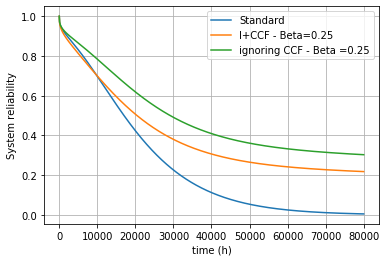

In [9]:
def predict(tempo):
    return Rsys.subs({t:tempo})
def predict_ccf(tempo):
    return Rsys_ccf.subs({t:tempo})


def predict_i(tempo):
    return Rsys_i.subs({t:tempo})
    
predict_v=np.vectorize(predict)
predict_ccf_v=np.vectorize(predict_ccf)
predict_i_v=np.vectorize(predict_i)

a=np.linspace(0,80000,1000)
plt.plot(a,predict_v(a), label='Standard')
plt.plot(a,predict_ccf_v(a), label='I+CCF - Beta='+str(beta_p))
plt.plot(a,predict_i_v(a), label='ignoring CCF - Beta ='+str(beta_p))
plt.xlabel('time (h)')
plt.ylabel('System reliability')
#plt.title('Comparison of reliability assessment method')   
plt.legend()
plt.grid()
plt.savefig('out2')

In [10]:
g=Rsys_ccf.subs({t:100})
h=Rsys_i.subs({t:100})
Fg=1-g
Fh=1-h

In [11]:
g,Fg

In [12]:
h,Fh